In [1]:
import torch
import numpy as np
import random
import time
import os
import matplotlib.pyplot as plt
from model.lf_model import LowFidelityPINN
from model.fixed_scheme_model import FixedSchemePINN 
from model.classic_pinn_model import ClassicalPINN 
from utils.pde_utils import evaluate, get_exact_solution, train_universal
from utils.plot_utils import plot, plot_theta_field

In [2]:
def test_heat():
    """Тест уравнения теплопроводности"""
    print("\n" + "="*60)
    print("ТЕСТ: Уравнение теплопроводности")
    print("="*60)
    
    model = LowFidelityPINN('heat', n_steps=5, theta_hidden_dim=5)
    domain = {'x': (0.0, 1.0), 't': (0.0, 0.5)}
    exact_sol = get_exact_solution('heat')
    
    history = train_universal(model, domain, epochs=1000, n_collocation=100, n_bc=10, n_ic=10)
    results = evaluate(model, domain, exact_solution=exact_sol)
    
    if isinstance(results['theta_statistics'], dict):
        theta_stats = results['theta_statistics']
        print(f"\nРезультаты:")
        print(f"  θ (среднее): {theta_stats['mean']:.4f} ± {theta_stats['std']:.4f}")
        print(f"  θ (диапазон): [{theta_stats['min']:.4f}, {theta_stats['max']:.4f}]")
    
    print(f"  PDE остаток: {results['pde_residual']:.2e}")
    if 'mean_error' in results:
        print(f"  Средняя ошибка: {results['mean_error']:.2e}")
        print(f"  Макс. ошибка: {results['max_error']:.2e}")
    
    plot(results, history, "Heat Equation - Low-Fidelity PINN")
    plot_theta_field(model, domain, "Heat Equation")
    
    return results, history


def test_wave():
    """Тест волнового уравнения"""
    print("\n" + "="*60)
    print("ТЕСТ: Волновое уравнение")
    print("="*60)
    
    model = LowFidelityPINN('wave', n_steps=5, theta_hidden_dim=5)
    domain = {'x': (0.0, 1.0), 't': (0.0, 1.0)}
    exact_sol = get_exact_solution('wave')
    
    history = train_universal(model, domain, epochs=1000, n_collocation=100, n_bc=10, n_ic = 10)
    results = evaluate(model, domain, exact_solution=exact_sol)
    
    if isinstance(results['theta_statistics'], dict):
        theta_stats = results['theta_statistics']
        print(f"\nРезультаты:")
        print(f"  θ (среднее): {theta_stats['mean']:.4f} ± {theta_stats['std']:.4f}")
        print(f"  θ (диапазон): [{theta_stats['min']:.4f}, {theta_stats['max']:.4f}]")
    
    print(f"  PDE остаток: {results['pde_residual']:.2e}")
    if 'mean_error' in results:
        print(f"  Средняя ошибка: {results['mean_error']:.2e}")
        print(f"  Макс. ошибка: {results['max_error']:.2e}")
    
    plot(results, history, "Wave Equation - Low-Fidelity PINN")
    plot_theta_field(model, domain, "Wave Equation")
    
    return results, history


def test_burgers():
    """Тест уравнения Бюргерса"""
    print("\n" + "="*60)
    print("ТЕСТ: Уравнение Бюргерса")
    print("="*60)
    
    model = LowFidelityPINN('burgers', n_steps=2, theta_hidden_dim=5)
    domain = {'x': (-1.0, 1.0), 't': (0.01, 0.3)}
    exact_sol = get_exact_solution('burgers')
    
    # Увеличены epochs и lr для сложного уравнения
    history = train_universal(model, domain, epochs=1000, n_collocation=100, n_bc=10)
    results = evaluate(model, domain, exact_solution=exact_sol)
    
    if isinstance(results['theta_statistics'], dict):
        theta_stats = results['theta_statistics']
        print(f"\nРезультаты:")
        print(f"  θ (среднее): {theta_stats['mean']:.4f} ± {theta_stats['std']:.4f}")
        print(f"  θ (диапазон): [{theta_stats['min']:.4f}, {theta_stats['max']:.4f}]")
    
    print(f"  PDE остаток: {results['pde_residual']:.2e}")
    if 'mean_error' in results:
        print(f"  Средняя ошибка: {results['mean_error']:.2e}")
        print(f"  Макс. ошибка: {results['max_error']:.2e}")
    
    plot(results, history, "Burgers Equation - Low-Fidelity PINN")
    plot_theta_field(model, domain, "Burgers Equation")
    
    return results, history


def test_reaction_diffusion():
    """Тест уравнения реакции-диффузии"""
    print("\n" + "="*60)
    print("ТЕСТ: Уравнение реакции-диффузии")
    print("="*60)
    
    model = LowFidelityPINN('reaction_diffusion', n_steps=2, theta_hidden_dim=5)
    domain = {'x': (-1.0, 3.0), 't': (0.0, 1.0)}
    exact_sol = get_exact_solution('reaction_diffusion')
    
    history = train_universal(model, domain, epochs=1000, n_collocation=100, n_bc=10)
    results = evaluate(model, domain, exact_solution=exact_sol)
    
    if isinstance(results['theta_statistics'], dict):
        theta_stats = results['theta_statistics']
        print(f"\nРезультаты:")
        print(f"  θ (среднее): {theta_stats['mean']:.4f} ± {theta_stats['std']:.4f}")
        print(f"  θ (диапазон): [{theta_stats['min']:.4f}, {theta_stats['max']:.4f}]")
    
    print(f"  PDE остаток: {results['pde_residual']:.2e}")
    if 'mean_error' in results:
        print(f"  Средняя ошибка: {results['mean_error']:.2e}")
        print(f"  Макс. ошибка: {results['max_error']:.2e}")
    
    plot(results, history, "Reaction-Diffusion - Low-Fidelity PINN")
    plot_theta_field(model, domain, "Reaction-Diffusion")
    
    return results, history


def test_poisson():
    """Тест уравнения Пуассона (стационарное 2D)"""
    print("\n" + "="*60)
    print("ВНИМАНИЕ: Уравнение Пуассона")
    print("="*60)
    print("Уравнение Пуассона - стационарное эллиптическое уравнение.")
    print("Метод трапеций предназначен для эволюционных задач (с временем).")
    print("\nДля стационарных задач нужна отдельная реализация:")
    print("- Не требуется временное интегрирование")
    print("- Используются классические PINN или другие методы")
    print("="*60)
    return None, None


def run_all_tests():
    """Запуск всех тестов"""
    print("\n" + "="*60)
    print("ЗАПУСК ВСЕХ ТЕСТОВ Low-Fidelity PINN")
    print("="*60)
    
    tests = [
        ('heat', test_heat),
        ('wave', test_wave),
        ('burgers', test_burgers),
        ('reaction_diffusion', test_reaction_diffusion),
    ]
    
    results_dict = {}
    
    for name, test_func in tests:
        try:
            print(f"\n{'='*60}")
            print(f"Запуск теста: {name.upper()}")
            print(f"{'='*60}")
            results, history = test_func()
            results_dict[name] = {'results': results, 'history': history}
        except Exception as e:
            print(f"\n❌ ОШИБКА в тесте {name}: {e}")
            import traceback
            traceback.print_exc()
            results_dict[name] = None
    
    # Итоговая таблица
    print("\n" + "="*60)
    print("ИТОГОВАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
    print("="*60)
    print(f"{'PDE':<20} {'Mean Error':<15} {'Max Error':<15} {'PDE Residual':<15} {'θ mean':<10}")
    print("-"*75)
    
    for name, data in results_dict.items():
        if data is None:
            print(f"{name:<20} {'FAILED':<15} {'FAILED':<15} {'FAILED':<15} {'FAILED':<10}")
        elif data['results'] is None:
            print(f"{name:<20} {'SKIPPED':<15} {'SKIPPED':<15} {'SKIPPED':<15} {'SKIPPED':<10}")
        else:
            res = data['results']
            mean_err = res.get('mean_error', 'N/A')
            max_err = res.get('max_error', 'N/A')
            pde_res = res.get('pde_residual', 'N/A')
            theta = res.get('theta_statistics', {})
            theta_mean = theta.get('mean', 'N/A') if isinstance(theta, dict) else 'N/A'
            
            mean_err_str = f"{mean_err:.2e}" if isinstance(mean_err, float) else str(mean_err)
            max_err_str = f"{max_err:.2e}" if isinstance(max_err, float) else str(max_err)
            pde_res_str = f"{pde_res:.2e}" if isinstance(pde_res, float) else str(pde_res)
            theta_str = f"{theta_mean:.3f}" if isinstance(theta_mean, float) else str(theta_mean)
            
            print(f"{name:<20} {mean_err_str:<15} {max_err_str:<15} {pde_res_str:<15} {theta_str:<10}")
    
    print("="*75)
    return results_dict


ЗАПУСК ВСЕХ ТЕСТОВ Low-Fidelity PINN

Запуск теста: HEAT

ТЕСТ: Уравнение теплопроводности

Low-Fidelity PINN
PDE: heat | Steps: 5 | Params: 26

   Epoch    0: Loss=1.77e-02, PDE=1.77e-02, BC=6.91e-16, IC=0.00e+00, θ=0.499±0.000
   Epoch  100: Loss=2.75e-03, PDE=2.75e-03, BC=1.85e-16, IC=0.00e+00, θ=0.432±0.010
   Epoch  200: Loss=1.42e-03, PDE=1.42e-03, BC=6.37e-16, IC=0.00e+00, θ=0.405±0.012
   Epoch  300: Loss=1.26e-03, PDE=1.26e-03, BC=8.56e-16, IC=0.00e+00, θ=0.405±0.013
   Epoch  400: Loss=1.02e-03, PDE=1.02e-03, BC=7.52e-16, IC=0.00e+00, θ=0.400±0.013
   Epoch  500: Loss=1.15e-03, PDE=1.15e-03, BC=6.95e-16, IC=0.00e+00, θ=0.395±0.013
   Epoch  600: Loss=8.65e-04, PDE=8.65e-04, BC=9.30e-17, IC=0.00e+00, θ=0.396±0.017
   Epoch  700: Loss=7.68e-04, PDE=7.68e-04, BC=4.84e-16, IC=0.00e+00, θ=0.389±0.021
   Epoch  800: Loss=4.80e-04, PDE=4.80e-04, BC=8.01e-16, IC=0.00e+00, θ=0.383±0.022
   Epoch  900: Loss=5.82e-04, PDE=5.82e-04, BC=8.66e-16, IC=0.00e+00, θ=0.373±0.029

Результаты:
 

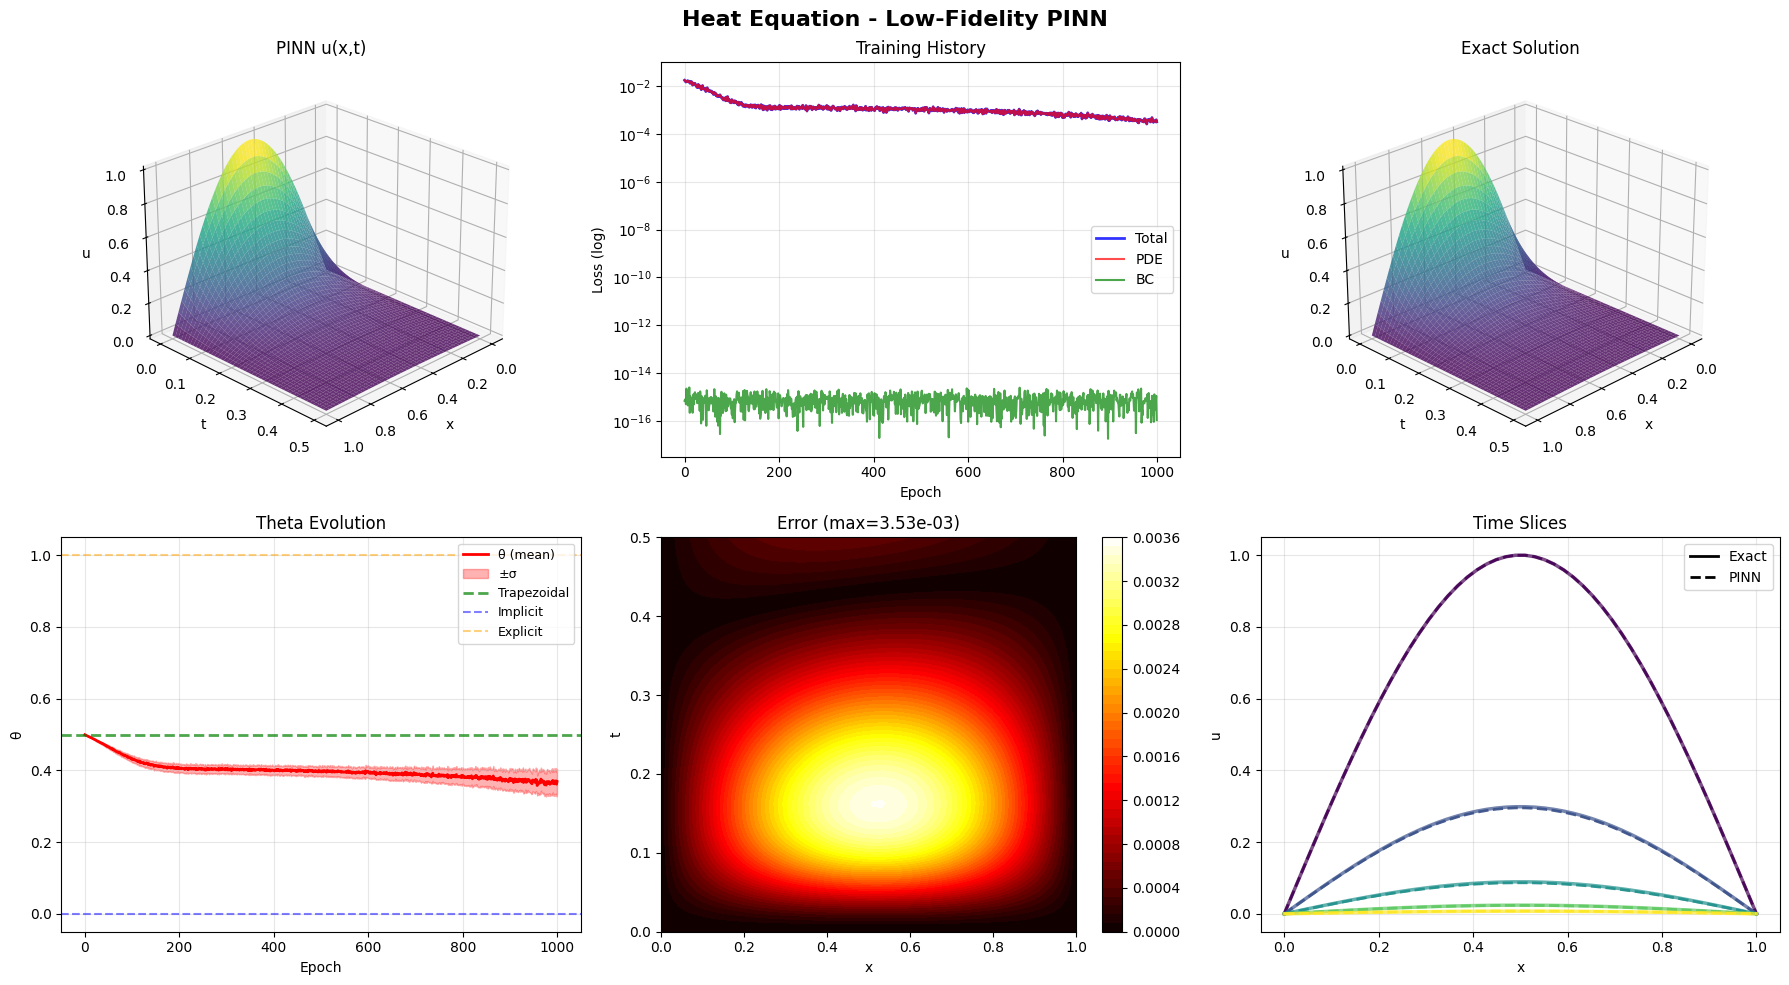


Final Parameters:
  n_steps              = 5.000000
  alpha                = 1.000000
Final Loss: 3.2270e-04
Mean Error: 1.0308e-03
Max Error:  3.5264e-03



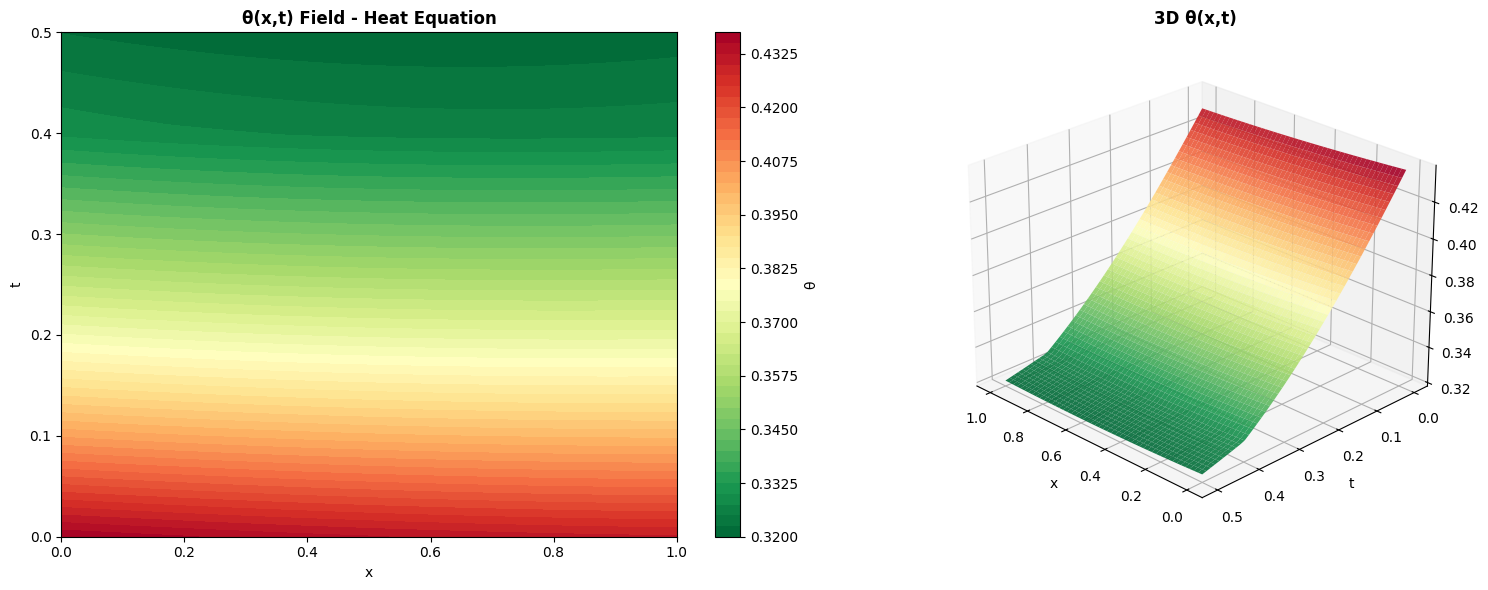


θ Statistics: mean=0.3650, std=0.0349, min=0.3205, max=0.4373

Запуск теста: WAVE

ТЕСТ: Волновое уравнение

Low-Fidelity PINN
PDE: wave | Steps: 5 | Params: 26

   Epoch    0: Loss=4.00e-01, PDE=4.00e-01, BC=4.32e-15, IC=0.00e+00, θ=0.500±0.000
   Epoch  100: Loss=2.67e-01, PDE=2.67e-01, BC=4.10e-15, IC=0.00e+00, θ=0.470±0.013
   Epoch  200: Loss=2.58e-01, PDE=2.58e-01, BC=4.59e-15, IC=0.00e+00, θ=0.456±0.027
   Epoch  300: Loss=2.68e-01, PDE=2.68e-01, BC=2.97e-15, IC=0.00e+00, θ=0.442±0.042
   Epoch  400: Loss=1.99e-01, PDE=1.99e-01, BC=4.95e-15, IC=0.00e+00, θ=0.433±0.065
   Epoch  500: Loss=1.51e-01, PDE=1.51e-01, BC=3.76e-15, IC=0.00e+00, θ=0.412±0.083
   Epoch  600: Loss=1.45e-01, PDE=1.45e-01, BC=4.20e-15, IC=0.00e+00, θ=0.424±0.094
   Epoch  700: Loss=1.38e-01, PDE=1.38e-01, BC=3.83e-15, IC=0.00e+00, θ=0.403±0.115
   Epoch  800: Loss=1.42e-01, PDE=1.42e-01, BC=5.12e-15, IC=0.00e+00, θ=0.395±0.125
   Epoch  900: Loss=1.27e-01, PDE=1.27e-01, BC=3.51e-15, IC=0.00e+00, θ=0.384±0.1

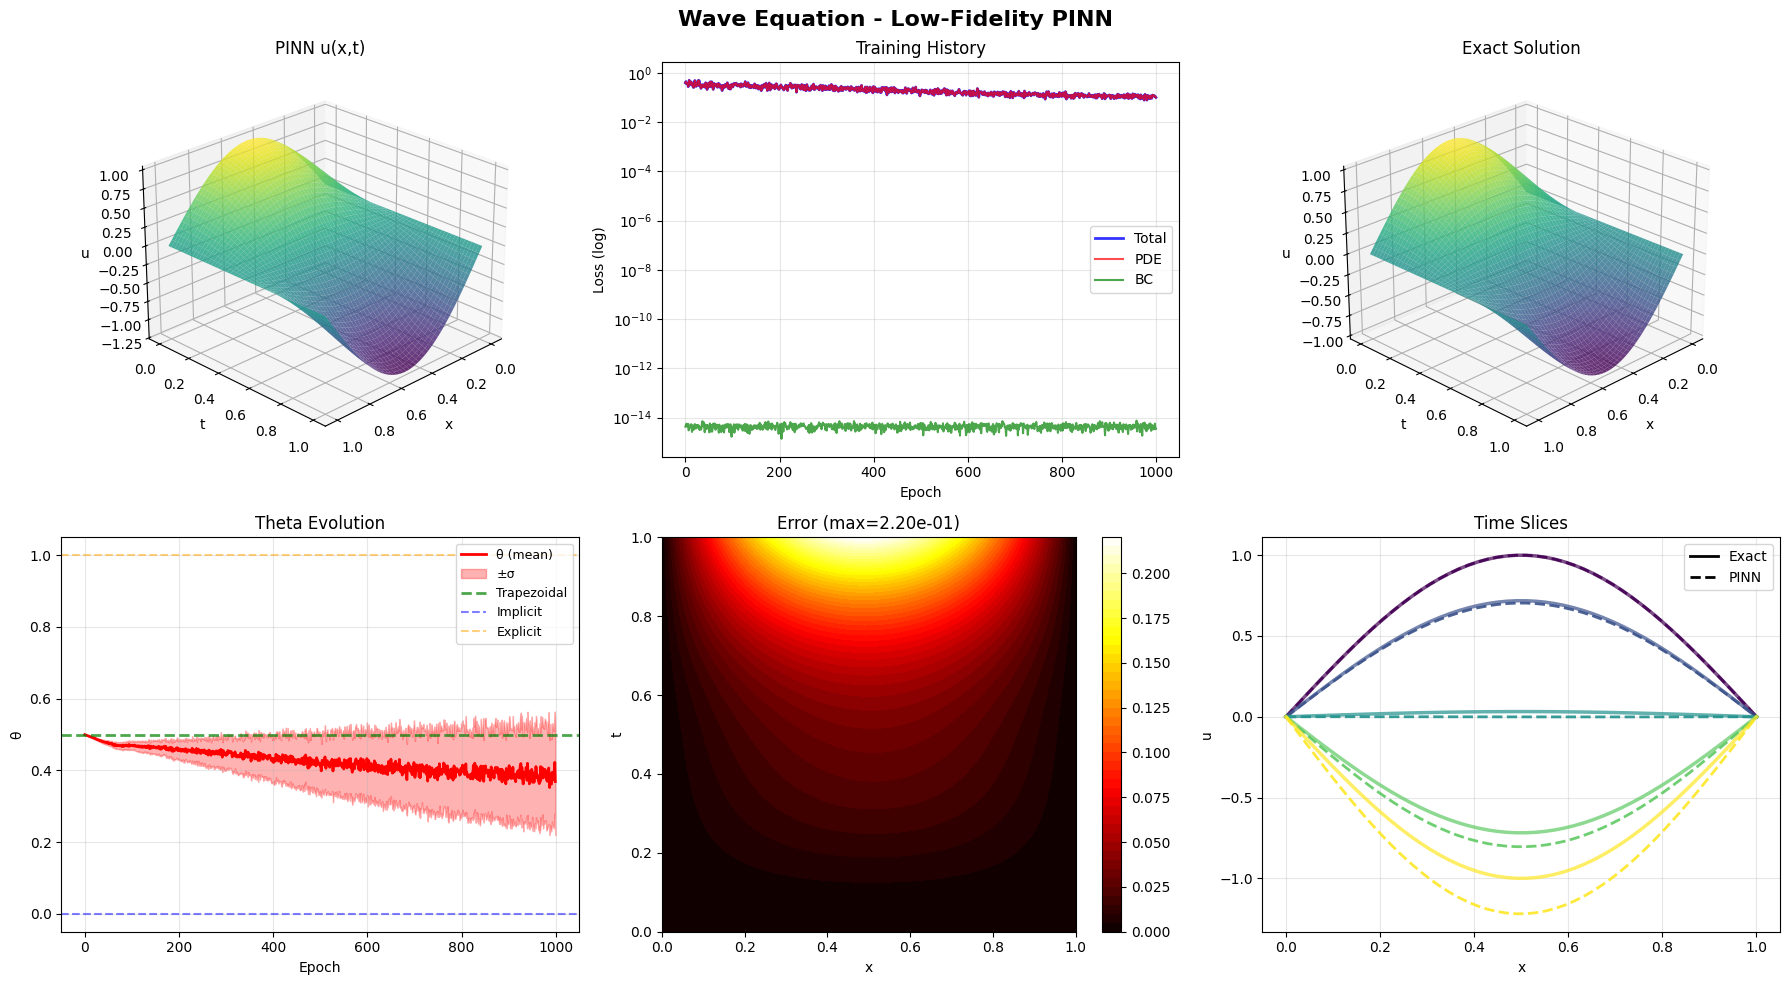


Final Parameters:
  n_steps              = 5.000000
  c                    = 1.000000
Final Loss: 1.0023e-01
Mean Error: 3.6315e-02
Max Error:  2.1981e-01



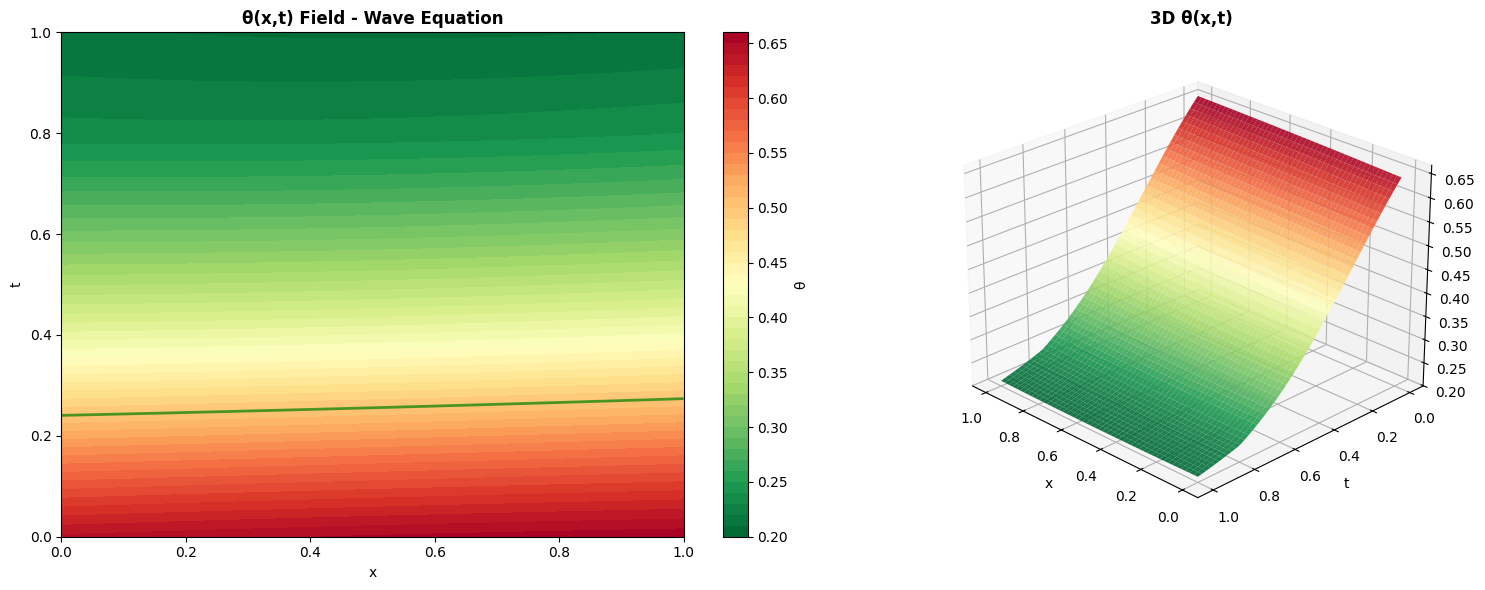


θ Statistics: mean=0.3836, std=0.1415, min=0.2086, max=0.6577

Запуск теста: BURGERS

ТЕСТ: Уравнение Бюргерса

Low-Fidelity PINN
PDE: burgers | Steps: 2 | Params: 26

   Epoch    0: Loss=6.85e-02, PDE=6.85e-02, BC=1.69e-14, IC=0.00e+00, θ=0.499±0.000
   Epoch  100: Loss=1.37e-01, PDE=1.37e-01, BC=1.21e-14, IC=0.00e+00, θ=0.437±0.002
   Epoch  200: Loss=1.34e-01, PDE=1.34e-01, BC=1.85e-14, IC=0.00e+00, θ=0.382±0.004
   Epoch  300: Loss=5.03e-02, PDE=5.03e-02, BC=1.60e-14, IC=0.00e+00, θ=0.359±0.006
   Epoch  400: Loss=1.28e-01, PDE=1.28e-01, BC=1.37e-14, IC=0.00e+00, θ=0.351±0.006
   Epoch  500: Loss=1.07e-01, PDE=1.07e-01, BC=1.78e-14, IC=0.00e+00, θ=0.335±0.007
   Epoch  600: Loss=9.23e-02, PDE=9.23e-02, BC=1.77e-14, IC=0.00e+00, θ=0.340±0.007
   Epoch  700: Loss=1.10e-01, PDE=1.10e-01, BC=1.58e-14, IC=0.00e+00, θ=0.338±0.008
   Epoch  800: Loss=1.59e-01, PDE=1.59e-01, BC=1.60e-14, IC=0.00e+00, θ=0.332±0.008
   Epoch  900: Loss=1.17e-01, PDE=1.17e-01, BC=1.49e-14, IC=0.00e+00, θ=0.3

/Users/igor.velikorechanin/Desktop/Masters/Thesis/Trapezioid Architecture PINN/utils/pde_utils.py:205: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  num, _ = quad(num_int, -10, 10, limit=100)
/Users/igor.velikorechanin/Desktop/Masters/Thesis/Trapezioid Architecture PINN/utils/pde_utils.py:205: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  num, _ = quad(num_int, -10, 10, limit=100)
/Users/igor.velikorechanin/Desktop/Masters/Thesis/Trapezioid Architecture PINN/utils/pde_utils.py:206: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  den, _ = quad(den_int, -10, 10, limit=100)



Результаты:
  θ (среднее): 0.3330 ± 0.0115
  θ (диапазон): [0.3174, 0.3664]
  PDE остаток: 4.35e-02
  Средняя ошибка: 2.08e-02
  Макс. ошибка: 1.57e-01


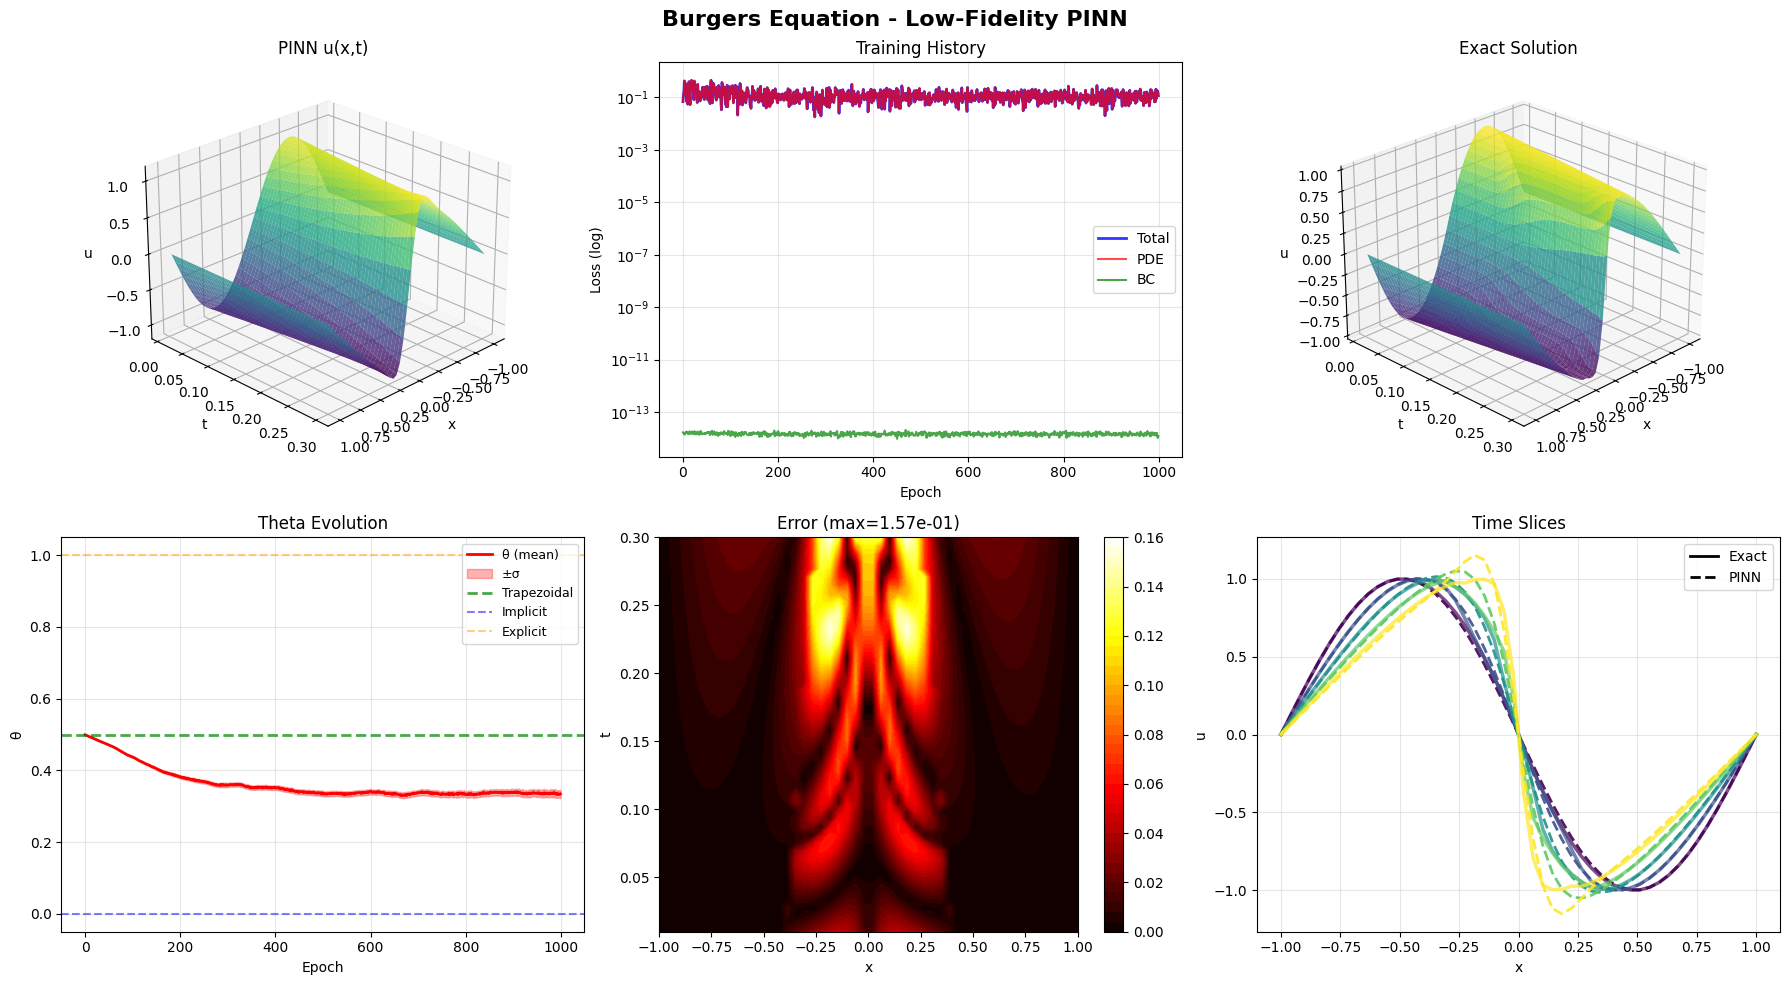


Final Parameters:
  n_steps              = 2.000000
  nu                   = 0.003183
Final Loss: 1.1596e-01
Mean Error: 2.0831e-02
Max Error:  1.5712e-01



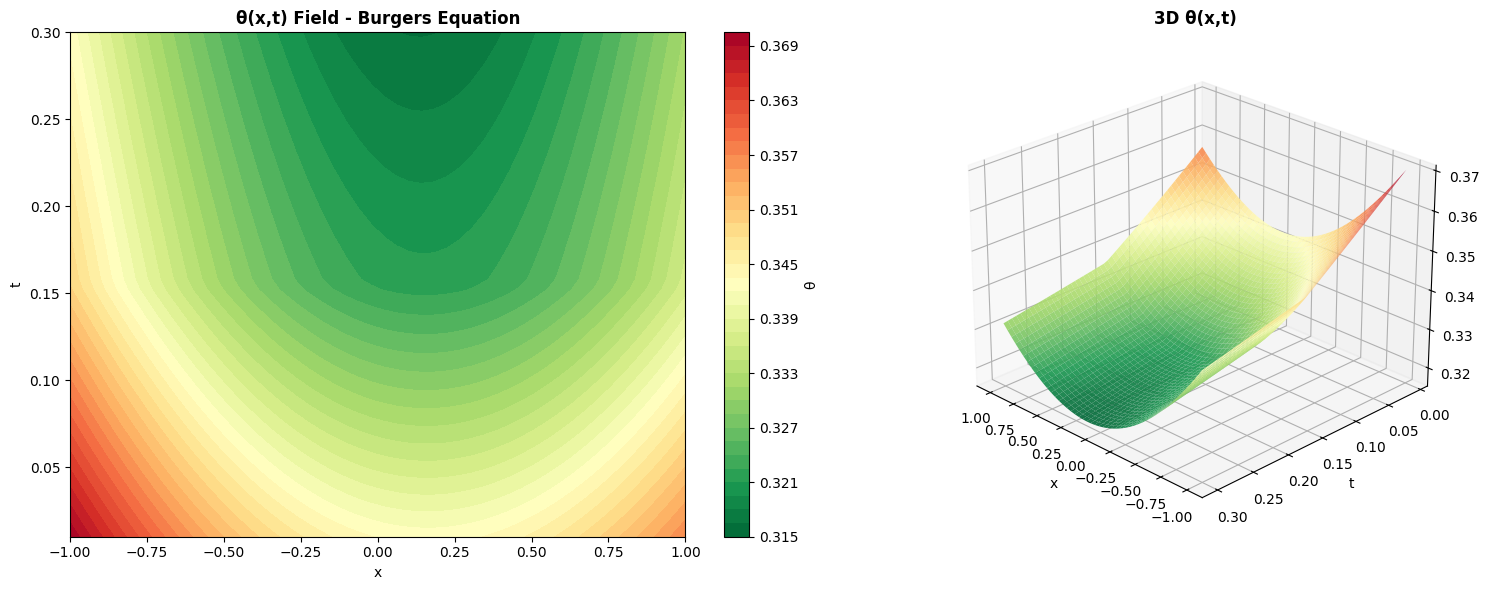


θ Statistics: mean=0.3334, std=0.0110, min=0.3164, max=0.3702

Запуск теста: REACTION_DIFFUSION

ТЕСТ: Уравнение реакции-диффузии

Low-Fidelity PINN
PDE: reaction_diffusion | Steps: 2 | Params: 26

   Epoch    0: Loss=4.97e-02, PDE=4.97e-02, BC=1.38e-11, IC=0.00e+00, θ=0.499±0.000
   Epoch  100: Loss=1.30e-02, PDE=1.30e-02, BC=2.44e-11, IC=0.00e+00, θ=0.439±0.007
   Epoch  200: Loss=1.42e-02, PDE=1.42e-02, BC=1.47e-11, IC=0.00e+00, θ=0.362±0.017
   Epoch  300: Loss=5.17e-02, PDE=5.17e-02, BC=1.46e-11, IC=0.00e+00, θ=0.305±0.024
   Epoch  400: Loss=1.41e-02, PDE=1.41e-02, BC=1.49e-11, IC=0.00e+00, θ=0.268±0.025
   Epoch  500: Loss=2.77e-03, PDE=2.77e-03, BC=1.08e-11, IC=0.00e+00, θ=0.239±0.026
   Epoch  600: Loss=1.66e-03, PDE=1.66e-03, BC=8.35e-12, IC=0.00e+00, θ=0.235±0.029
   Epoch  700: Loss=6.37e-03, PDE=6.37e-03, BC=1.36e-11, IC=0.00e+00, θ=0.216±0.029
   Epoch  800: Loss=2.11e-03, PDE=2.11e-03, BC=1.71e-11, IC=0.00e+00, θ=0.203±0.029
   Epoch  900: Loss=9.92e-04, PDE=9.92e-04, B

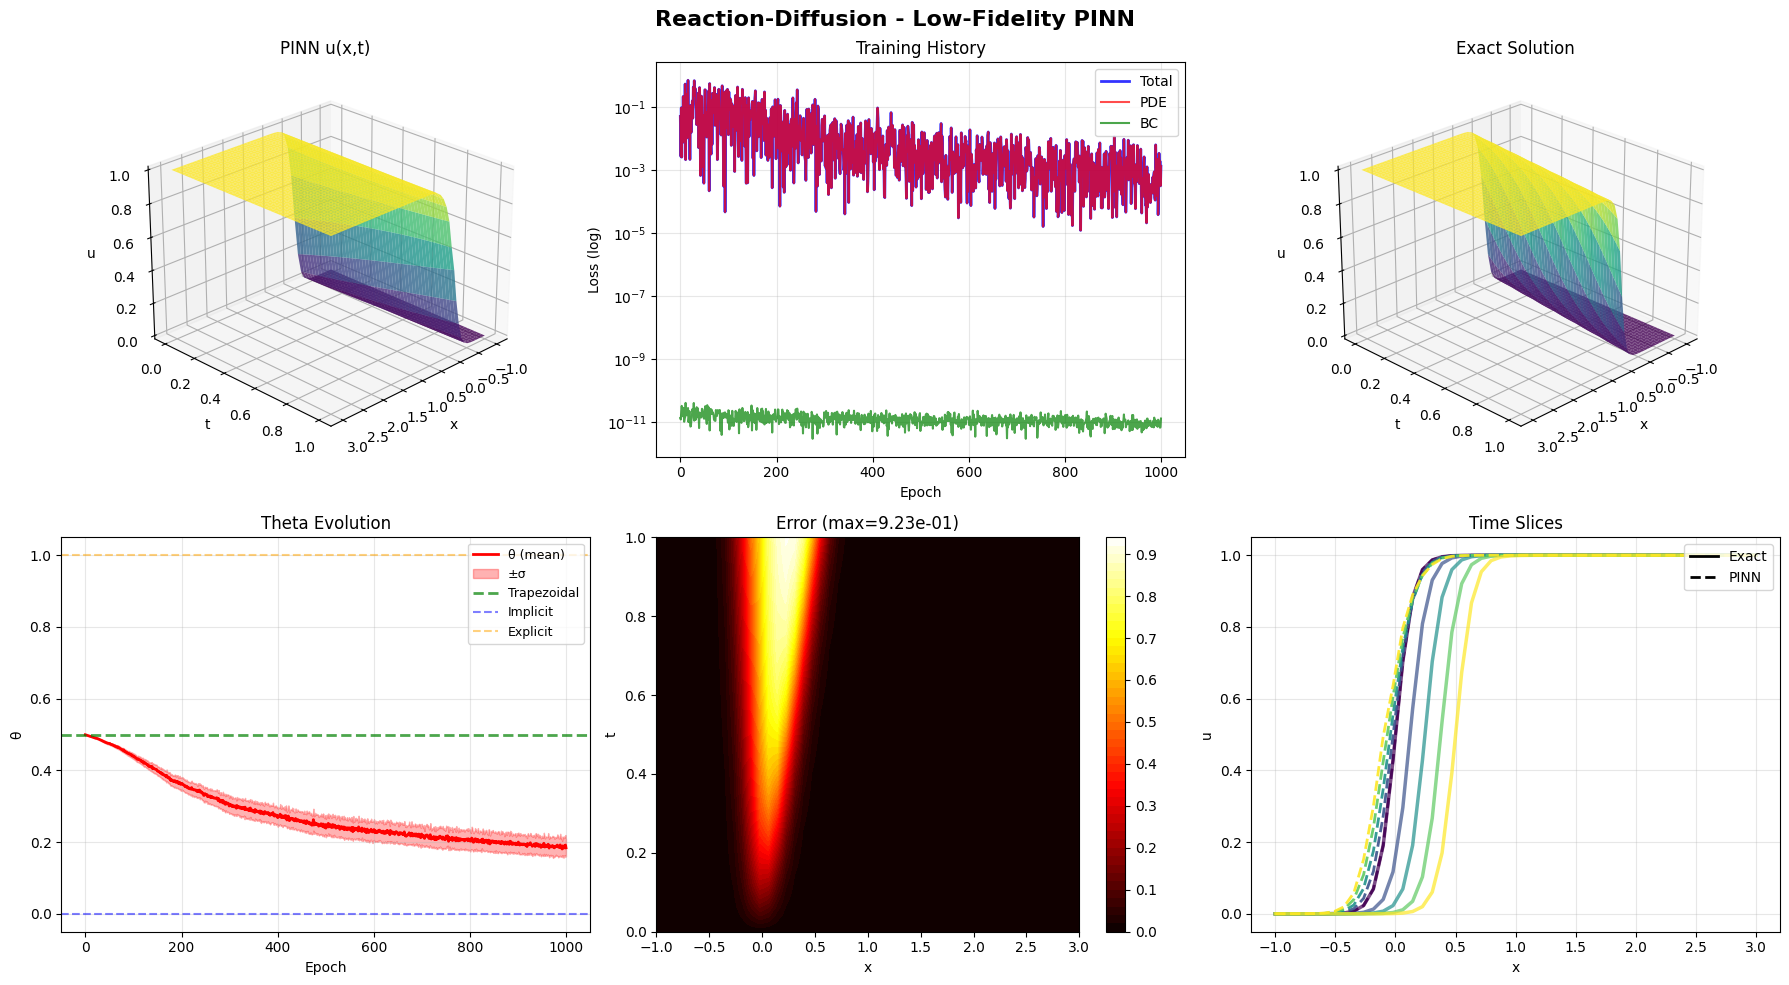


Final Parameters:
  n_steps              = 2.000000
  D                    = 0.010000
  r                    = 1.000000
Final Loss: 1.3046e-03
Mean Error: 7.1006e-02
Max Error:  9.2328e-01



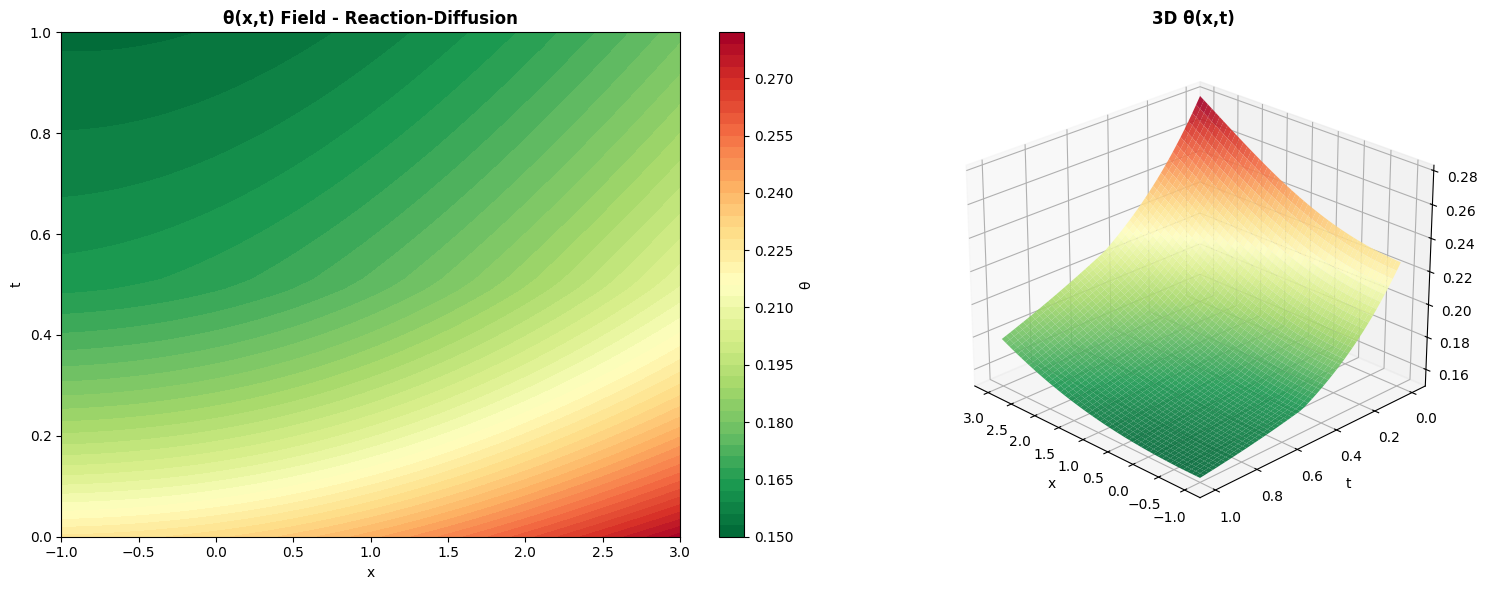


θ Statistics: mean=0.1879, std=0.0276, min=0.1523, max=0.2804

Запуск теста: POISSON

ВНИМАНИЕ: Уравнение Пуассона
Уравнение Пуассона - стационарное эллиптическое уравнение.
Метод трапеций предназначен для эволюционных задач (с временем).

Для стационарных задач нужна отдельная реализация:
- Не требуется временное интегрирование
- Используются классические PINN или другие методы

ИТОГОВАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
PDE                  Mean Error      Max Error       PDE Residual    θ mean    
---------------------------------------------------------------------------
heat                 1.03e-03        3.53e-03        4.16e-04        0.371     
wave                 3.63e-02        2.20e-01        1.36e-01        0.363     
burgers              2.08e-02        1.57e-01        4.35e-02        0.333     
reaction_diffusion   7.10e-02        9.23e-01        9.45e-05        0.189     
poisson              SKIPPED         SKIPPED         SKIPPED         SKIPPED   


{'heat': {'results': {'points': tensor([[0.0000, 0.0000],
           [0.0000, 0.0102],
           [0.0000, 0.0204],
           ...,
           [1.0000, 0.4796],
           [1.0000, 0.4898],
           [1.0000, 0.5000]]),
   'u_pred': tensor([[ 0.0000e+00],
           [ 0.0000e+00],
           [ 0.0000e+00],
           ...,
           [-7.9188e-10],
           [-7.2373e-10],
           [-6.6206e-10]]),
   'grid_shape': (50, 50),
   'pde_type': 'heat',
   'pde_residual': 0.00041564705315977335,
   'theta_statistics': {'mean': 0.3711082935333252,
    'std': 0.03645876795053482,
    'min': 0.3210707902908325,
    'max': 0.4338364601135254},
   'is_spatial_2d': False,
   'model_type': 'LowFidelityPINN',
   'u_exact': tensor([[ 0.0000e+00],
           [ 0.0000e+00],
           [ 0.0000e+00],
           ...,
           [-7.6903e-10],
           [-6.9535e-10],
           [-6.2873e-10]]),
   'error': tensor([[0.0000e+00],
           [0.0000e+00],
           [0.0000e+00],
           ...,
       

In [3]:
run_all_tests()